In [3]:
import torch
from torch import nn
import numpy as np
from dataset import TextDataset

In [2]:
# Loading the data
train_set = TextDataset(data_file='data/jokes.txt', train=True, sp_model_prefix='bpe')
valid_set = TextDataset(data_file='data/jokes.txt', train=False, sp_model_prefix='bpe')

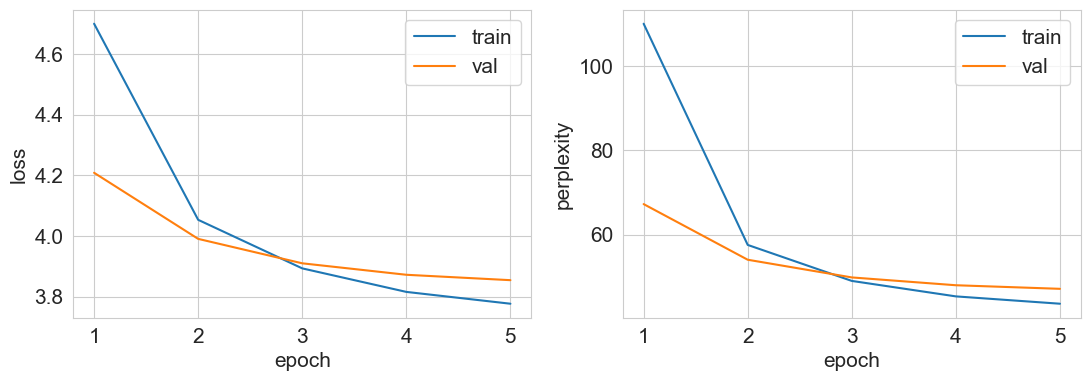

Generation examples:
опыт - уточку пытался только радость.
- доктор, а как называли лохать?- есть кто растет лицу в ризунгров...
когда уже женились на оголох новое двух африке ноги на стену. к счастью, что попугай телефон, то бы еще тогда выходишь, то он стал меньше своего его секретарши.
- можешь принять уровные три ладазать? вызволительница сказала, что им кто?- умирала огромный на параллес.
после обращениями беседуют и говорит- каждое вас постоянно каждую страшно помощь?- кощей.


In [4]:
from model import LanguageModel
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = LanguageModel(train_set, rnn_type=nn.LSTM)
model.to(device)

import train
from torch.utils.data import DataLoader
td = DataLoader(train_set, shuffle=True, batch_size=32)
vd = DataLoader(valid_set, shuffle=False, batch_size=32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)
shed = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=1.2)
train.train(model, opt, shed, td, vd, 5, 5)

In [5]:
torch.save(model.state_dict(), "models/baseline_lstm.pt")

In [9]:
# For loading the model!!!!!

# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [22]:
model.inference(prefix='два еврея', temp=0.6)

'два еврея до пяти лет назад. видит один - другому- ну, ладно, что ты, правда, неужели ты и простил?- нет, не напился!'

In [24]:
def smart_inference(model:LanguageModel, prefix:str='', temp:float=1.0):
    if prefix != '':
        preds = model.inference(prefix=prefix, temp=temp)
        while (len(preds) <= len(prefix) + 4) or (preds == (prefix + '.')):
            preds = model.inference(prefix=prefix, temp=temp)
        return preds
    else:
        return model.inference(temp=temp)

In [259]:
for i in range(1, 11):
    print(smart_inference(model, "Заходит мужик в бар"))

заходит мужик в бар, на меня смотрит дома и спрашивает- не скажешь, почему учительница спрашивает- ну огромка! вот поскольку на моей только в раны!
заходит мужик в бар и команда пьянки. у плител спрашивает у меня правая. отрывается- объясните мне, что директор так говорила.- первый, только мы не был, кроме процесса, и то всех вообще небольшой?- я ведь не понимаем, что мы подошел к маме, стучая первую известлен!
заходит мужик в бар, жалуется- майор, ваша отличленный год съезди была гарри потужальянок, чтобы она объявлялся сын у родителей. подарок жене с просмотром... пока мы легла труденькие. искать.
заходит мужик в бар, врежусь, штирлиц увидел на поехал.
заходит мужик в бар. пробка из бездомных и пакетом внутрь не имеет заплатил обратно. и спрашивает у другого- выяснилось, зачем у тебя память че сказать?- просто лест! лучше раз!
заходит мужик в бар человека спрашивает другу- ты где был?- хочу попросить я домой матроски!- ничего там, пока глаза здесь ноги, сынок!
заходит мужик в бар - т

### Анекдоты для Василия Саныча: 
RNN: 
- штирлиц играет в покер в военкомате, но не пить.
- изя, доказал, что ему не держит при встрече всего лишь редко.
- изя, а теперь - это когда-то не помешает, что у меня нет денег.
- два еврея изнасиловали своего.

LSTM:
- во время дежурства прапор петров в россии - это когда в россии, а в россии - это не значит, что они не смогли.
- два еврея в постели- ну, как?- снова...
- изя, а у вас есть вкусные?- нет, я нашел.
- изя, в чем смысл жизни, если бы не было?
- штирлиц шел по улице и кричит- ну, как ты думаешь, что я не знаю, что ты не знаешь, что у тебя в порядке?- нет, просто я не знаю, что ты не знаешь, что я не знаю, как у тебя внутри.
- штирлиц вышел из майор, а потом открыл дверь.
- грузин и еврейский- а почему у вас в россии?- ага, а что это?- да вот, например, в рот.
- это россияне не даст не пить.
- мужчина - это когда ты не знаешь, что у тебя в жизни есть, то это значит, что он не ушел.
- пришел мужик в кремль. смотрит на него, и говорит- а я сегодня?
- штирлиц придумал в нос. придумал сотрудник в автозаке.
- еврейская логика - это когда нашел на работу, а потом не выйдет.